  <tr>
        <td width="15%">
        </td>
        <td>
            <div align="left">
                <font size=25px>
                    <b>Vehicle Performance Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
The objective of the dataset is to predict performance of vehicle


## Data Definition:

Attribute Information:

1. Kilometer_per_liter: distance in kilometer traveled per liter
2. cylinders: No of cylinders
3. displacement: displacement
4. horsepower: Horsepower is a unit of measurement of power, or the rate at which work is done, usually in reference to the output of engines or motors
5. weight: Weight of car
6. acceleration: Acceleration of Car
7. model year: Model Year of the car
8. origin: Country origin
9. car name: Car brand and model name (unique for each instance)

1. **[Import Packages](#import_packages)**
2. **[Read Data](#Read_Data)**
3. **[Data Preprocessing](#Data_Preprocessing)**
    - 3.1 - [Data Types and Dimensions](#Data_Types)
    - 3.2 - [Checking for Missing Values](#Checking_for_Missing_Values)
    - 3.3 - [Data Correction](#Data_Correction)
    - 3.4 - [Statistical Summary](#Statistical_Summary)    
4. **[EDA](#EDA)**
    - 4.1 - [Univariate Analysis](#Univariate_Analysis)
    - 4.2 - [Multivariate Analysis](#Multivariate_Analysis)
    - 4.3 - [Covariance](#Covariance)
    - 4.4 - [Correlation](#Correlation)
5. **[Label Encoding of Categorical Data](#Label_Encoding_of_Categorical_Data)**
6. **[Standardise Data](#Standardise_Data)**
7. **[Linear Regression](#Linear_Regression)**
    - 7.1 - [Ordinary Least Square](#Ordinary_Least_Square)
    - 7.2 - [Linear Regression using SGD](#Linear_Regression_using_SGD)
8. **[Model Comparision](#model_cmp)** 
  

<a id='import_packages'></a>
## 1. Import Packages

In [165]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# Set default setting of seaborn
sns.set()

import os

In [166]:
os.getcwd()

'C:\\Users\\Dhananjay\\Documents\\PGDA Data Science\\imarticus PGDA\\Machine learning\\Supervised Learning\\Linear Regression\\Vehicle Performance Prediction'

<a id='Read_Data'></a>
## 2. Read the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Read the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [167]:
# read the data
raw_data = pd.read_csv('data.csv',na_values='?')

# print the first five rows of the data
raw_data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443


In [168]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [169]:
data = raw_data.copy(deep = True)

In [170]:
missvals = data.isnull().sum()
missvals[missvals > 0]

horsepower    6
dtype: int64

In [171]:
data.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [172]:
data.loc[data.horsepower.isnull()]

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
32,1,4,98.0,NaN,2046,19.0,1971,ford pinto,10.628593
126,1,6,200.0,NaN,2875,17.0,1974,ford maverick,8.928018
330,2,4,85.0,NaN,1835,17.3,1980,renault lecar deluxe,17.388378
336,1,4,140.0,NaN,2905,14.3,1980,ford mustang cobra,10.033391
354,2,4,100.0,NaN,2320,15.8,1981,renault 18i,14.667458
374,1,4,151.0,NaN,3035,20.5,1982,amc concord dl,9.778305


In [173]:
mvidx = data.loc[data.horsepower.isnull()].index
mvidx

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [174]:
hp = data.groupby('name')['horsepower'].mean()
hp['renault lecar deluxe']

nan

In [175]:
data.groupby(['name','horsepower'])

In [176]:
data.loc[mvidx,'name'].apply(lambda x: hp[x] )

32     83.4
126    81.5
330     NaN
336     NaN
354     NaN
374     NaN
Name: name, dtype: float64

In [177]:
## Missing Value Treatment- Only horsepower column have missing values.
data.loc[mvidx, 'horsepower'] = data.loc[mvidx,'name'].apply(lambda x: hp[x])

In [178]:
data.loc[mvidx, 'horsepower']

32     83.4
126    81.5
330     NaN
336     NaN
354     NaN
374     NaN
Name: horsepower, dtype: float64

In [179]:
data.dropna(inplace=True)

In [180]:
data.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [181]:
data.origin.value_counts()

1    247
3     79
2     68
Name: origin, dtype: int64

In [182]:
data.describe()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,1.573604,5.469543,194.181472,104.357614,2974.959391,15.553807,1975.961929,9.966922
std,0.804513,1.703263,104.490759,38.425110,848.552396,2.758313,3.684238,3.310379
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,105.000000,75.250000,2223.750000,13.800000,1973.000000,7.280586
50%,1.000000,4.000000,151.000000,92.500000,2803.500000,15.500000,1976.000000,9.672019
75%,2.000000,8.000000,265.750000,125.000000,3612.000000,17.075000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [183]:
'chevrolet chevelle malibu'.split(' ',1)

['chevrolet', 'chevelle malibu']

In [184]:
'plymouth satellite'.split()

['plymouth', 'satellite']

In [185]:
data['manufacturer'] = data.name.str.split().apply(lambda x: x[0])
data['model'] = data.name.str.split(' ',1).apply(lambda x: x[-1] )

In [186]:
data.manufacturer.value_counts().sort_index()

amc              27
audi              7
bmw               2
buick            17
cadillac          2
capri             1
chevroelt         1
chevrolet        43
chevy             3
chrysler          6
datsun           23
dodge            28
fiat              8
ford             50
hi                1
honda            13
maxda             2
mazda            10
mercedes          1
mercedes-benz     2
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           3
saab              4
subaru            4
toyota           25
toyouta           1
triumph           1
vokswagen         1
volkswagen       15
volvo             6
vw                6
Name: manufacturer, dtype: int64

In [187]:
data.model.value_counts()

pinto         6
rabbit        5
corolla       5
matador       5
maverick      5
             ..
fury          1
skyhawk       1
monza 2+2     1
mustang ii    1
s-10          1
Name: model, Length: 296, dtype: int64

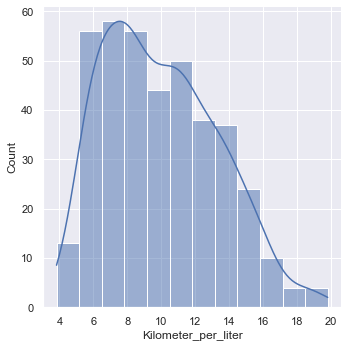

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data.Kilometer_per_liter, kde=True)
plt.show()

In [189]:
data.Kilometer_per_liter.skew()

0.45882337627471315

In [190]:
import numpy as np
data['logkpl'] = np.log(data['Kilometer_per_liter'])

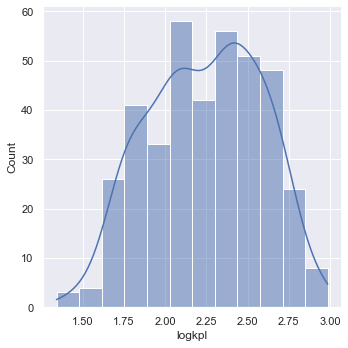

In [191]:
sns.displot(data.logkpl, kde=True)
plt.show()

In [192]:
data.logkpl.skew()

-0.13303954704843102

In [193]:
## Selecting only the numerical columns
numdf = data.select_dtypes(exclude='object')
numdf.shape

(394, 9)

In [194]:
numdf.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter', 'logkpl'],
      dtype='object')

### Correlation

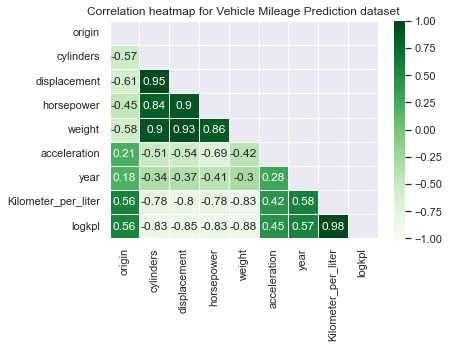

In [195]:
corr = numdf.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(data = numdf.corr(), mask=mask, center=0, annot = True, linewidth=0.5, cmap='Greens', cbar=True, vmin=-1, vmax=1)

## Correlation heatmap for iris dataset
plt.title("Correlation heatmap for Vehicle Mileage Prediction dataset")

plt.show()

### VIF

In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
#X = numdf[['displacement', 'weight', 'horsepower']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = numdf.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numdf.values, i) for i in range(len(numdf.columns))]

print(vif_data)


               feature          VIF
0               origin     9.046739
1            cylinders   124.404255
2         displacement    97.898383
3           horsepower    87.452815
4               weight   155.507117
5         acceleration    87.654456
6                 year  1852.357520
7  Kilometer_per_liter   415.062757
8               logkpl  2604.196766


In [197]:
## Let us separate the independent and dependent variables
X=numdf.drop(['Kilometer_per_liter','logkpl'],axis=1)
y=numdf['logkpl']

In [198]:
print(X.shape, y.shape)

(394, 7) (394,)


In [199]:
## Importing the libraries for building and evaluating the model
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

## Building the Linear Regression model

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)
tr_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
test_pred = np.exp(test_pred)

In [201]:
y_test_actual = numdf.loc[y_test.index, 'Kilometer_per_liter']
y_test_actual.head()

81     11.904024
225     7.440015
356    13.774656
119     8.502874
208     5.526868
Name: Kilometer_per_liter, dtype: float64

In [202]:
np.exp(y_test).head()

81     11.904024
225     7.440015
356    13.774656
119     8.502874
208     5.526868
Name: logkpl, dtype: float64

In [203]:
print("Training R2 Score",r2_score(np.exp(y_train),np.exp(tr_pred)))

Training R2 Score 0.8521747848898571


In [204]:
print("Training RMSE Score", np.sqrt(mean_squared_error(np.exp(y_train),np.exp(tr_pred))))

Training RMSE Score 1.2919345512223817


In [205]:
print("Test R2 Score",r2_score(np.exp(y_test),test_pred))

Test R2 Score 0.8719324828104141


In [206]:
print("Test RMSE Score", np.sqrt(mean_squared_error(np.exp(y_test),test_pred)))

Test RMSE Score 1.0871561020462945


In [207]:
print(lr.coef_, lr.intercept_)

[ 0.04023573 -0.03045003  0.00066266 -0.0013275  -0.00025907 -0.00079388
  0.02996831] -56.07696553165325


In [208]:
X.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year'],
      dtype='object')

## Building the SGD Regression Model

In [209]:
## Initialize the model
sgd = SGDRegressor()

sgd.fit(X_train, y_train)
sg_tr_pred = sgd.predict(X_train)
sg_test_pred = sgd.predict(X_test)

sg_tr_pred = np.exp(sg_tr_pred)
sg_test_pred = np.exp(sg_test_pred)

In [210]:
print("Training R2 Score",r2_score(np.exp(y_train),sg_tr_pred))
print("Training RMSE Score", np.sqrt(mean_squared_error(np.exp(y_train),sg_tr_pred)))

Training R2 Score -9.003380610992668
Training RMSE Score 10.627708889965383


In [211]:
print("Test R2 Score",r2_score(np.exp(y_test),sg_test_pred))
print("Test RMSE Score", np.sqrt(mean_squared_error(np.exp(y_test),sg_test_pred)))

Test R2 Score -9.791531261097255
Test RMSE Score 9.9796187284279


## Scaling the data using Standard Scaler

In [212]:
## Initialize the standard scalar
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [213]:
sgd.fit(X_train_scaled, y_train)
sg_tr_pred = sgd.predict(X_train_scaled)
sg_test_pred = sgd.predict(X_test_scaled)

sg_tr_pred = np.exp(sg_tr_pred)
sg_test_pred = np.exp(sg_test_pred)


In [214]:
print("Training R2 Score",r2_score(np.exp(y_train),sg_tr_pred))
print("Training RMSE Score", np.sqrt(mean_squared_error(np.exp(y_train),sg_tr_pred)))

Training R2 Score 0.8343167594449252
Training RMSE Score 1.36774628347055


In [215]:
print("Test R2 Score",r2_score(np.exp(y_test),sg_test_pred))
print("Test RMSE Score", np.sqrt(mean_squared_error(np.exp(y_test),sg_test_pred)))

Test R2 Score 0.8617200804010341
Test RMSE Score 1.1296709790310608


<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data :<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Data Correction<br> 
                        3. Study summary statistics<br> 
                        4. Check for missing values<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Types'></a>
## 3.1 Data Types and Dimensions

In [216]:
# check the data types for variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 397
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               394 non-null    int64  
 1   cylinders            394 non-null    int64  
 2   displacement         394 non-null    float64
 3   horsepower           394 non-null    float64
 4   weight               394 non-null    int64  
 5   acceleration         394 non-null    float64
 6   year                 394 non-null    int64  
 7   name                 394 non-null    object 
 8   Kilometer_per_liter  394 non-null    float64
 9   manufacturer         394 non-null    object 
 10  model                394 non-null    object 
 11  logkpl               394 non-null    float64
dtypes: float64(5), int64(4), object(3)
memory usage: 48.1+ KB


<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>From the above output, we see that 'horsepower' is categorical variables which is invalid
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [217]:
raw_data.shape

(398, 9)

**We see the dataframe has 9 columns and 398 observations**

<a id='Checking_for_Missing_Values'></a>
## 3.2 Checking for Missing Values

In [218]:
# get the count of missing values
missing_values = data.isnull().sum()

# print the count of missing values
print(missing_values)

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
manufacturer           0
model                  0
logkpl                 0
dtype: int64


**There are no missing values in the dataset**

<a id='Data_Correction'></a>
## 3.3 Data Correction

In [219]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
manufacturer            object
model                   object
logkpl                 float64
dtype: object

**Horsepower an object and not a float, the values we saw above were clearly numbers Lets try converting the column using astype()**

Let's look at the unique elements of horsepower to look for discrepancies 

In [220]:
data.horsepower.unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  83.4, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  81.5,
        67. ,  83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,
        71. ,  98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. ,
       108. ,  68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. ,
       103. , 125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,
        84. ,  64. ,  74. , 116. ,  82. ])

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>'?' in horsepower is a placeholder for missing values</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Removing '?' from horsepower**

In [221]:
data = data[data.horsepower != '?']

In [222]:
'?' in data.horsepower

False

In [223]:
data.shape

(394, 12)

In [224]:
data.horsepower = data.horsepower.astype('float')


In [225]:
data.dtypes


origin                   int64
cylinders                int64
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
manufacturer            object
model                   object
logkpl                 float64
dtype: object

**On to preparing the categorical features :**

* model_year is ordinal. So we simply stick to dtype int.
* origin is a true categorical. We need to one hot encode it later.
* name actually contains two useful bits of information: the cars manufacturer and the model. We split that into two new columns.

In [226]:
data_1 = data.copy(deep = True)

In [227]:
data_1.origin = data_1.origin.astype('object')

In [228]:
data_1.origin.value_counts()

1    247
3     79
2     68
Name: origin, dtype: int64

In [229]:
data_1.name.head()

0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
Name: name, dtype: object

In [230]:
data_1["name"].str.split(" ", n=1, expand=True)

,0,1
0,chevrolet,chevelle malibu
1,buick,skylark 320
2,plymouth,satellite
3,amc,rebel sst
4,ford,torino
...,...,...
393,ford,mustang gl
394,vw,pickup
395,dodge,rampage
396,ford,ranger


In [231]:
# split() with expand=True yields one column per list element
# we only split on the first space by setting n=1
data_1[["manufacturer", "model"]] = data_1["name"].str.split(" ", n=1, expand=True)
data_1.drop("name", axis=1, inplace=True)
data_1.head(1).T

,0
origin,1
cylinders,8
displacement,307.0
horsepower,130.0
weight,3504
acceleration,12.0
year,1970
Kilometer_per_liter,7.652587
manufacturer,chevrolet
model,chevelle malibu


In [232]:
print(sorted(data_1.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


**There are several errors in the manufacturers names. E.g. «vokswagen», «maxda» etc. We fix these by replacing the wrong entries. We also fix some synomyms like «vw».**

In [233]:
errors = {
         "vokswagen" : "volkswagen", 
         "vw" : "volkswagen", 
         "toyouta" : "toyota", 
         "mercedes-benz" : "mercedes", 
    
         "chevroelt": "chevrolet",
         "chevy" : "chevrolet", 
         "maxda" : "mazda"
         }

data_1.manufacturer = data_1.manufacturer.map(errors).fillna(data_1.manufacturer)

In [234]:
print(sorted(data_1.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda', 'mercedes', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo']


**Some model names also seem redundant or wrong.**

Hand checking would be way too time-consuming so we only improve this features brute-force by removing all special characters.

In [235]:
data_1.model.value_counts()

pinto         6
rabbit        5
corolla       5
matador       5
maverick      5
             ..
fury          1
skyhawk       1
monza 2+2     1
mustang ii    1
s-10          1
Name: model, Length: 295, dtype: int64

In [236]:
import re
def alphanumeric(x):
    return re.sub('[^A-Za-z0-9]+', '', (str(x)))

In [237]:
alphanumeric('s-10')

's10'

In [238]:
data_1["model"] = data_1.model.apply(lambda x: alphanumeric(x))

In [239]:
data_1.model.value_counts()

pinto        6
rabbit       5
maverick     5
corolla      5
matador      5
            ..
skyhawk      1
monza22      1
mustangii    1
astro        1
s10          1
Name: model, Length: 293, dtype: int64

In [240]:
print(len(data_1.model.unique()))

293


**Now everything looks in order so let's describe the dataset**

<a id='Statistical_Summary'></a>
## 3.4 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> In our dataset we have numerical variables. Now we check for summary statistics of all the variables<br>
                        For numerical variables, we use .describe(). For categorical variables we use describe(include='object').
          <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [241]:
# data frame with numerical features
data_1.describe()

,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,logkpl
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,5.469543,194.181472,104.357614,2974.959391,15.553807,1975.961929,9.966922,2.243154
std,1.703263,104.490759,38.425110,848.552396,2.758313,3.684238,3.310379,0.339238
min,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293,1.341897
25%,4.000000,105.000000,75.250000,2223.750000,13.800000,1973.000000,7.280586,1.985132
50%,4.000000,151.000000,92.500000,2803.500000,15.500000,1976.000000,9.672019,2.269177
75%,8.000000,265.750000,125.000000,3612.000000,17.075000,1979.000000,12.329168,2.511968
max,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697,2.986273


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [242]:
# data frame with categorical features
data_1.describe(include='object')

,origin,manufacturer,model
count,394,394,394
unique,3,30,293
top,1,ford,pinto
freq,247,50,6


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of the categorical variables i.e diagnosis(no.of levels in the variable), top(majority level) and the count of the majority level.</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='EDA'></a>
## 4. EDA


**PDF's of features**

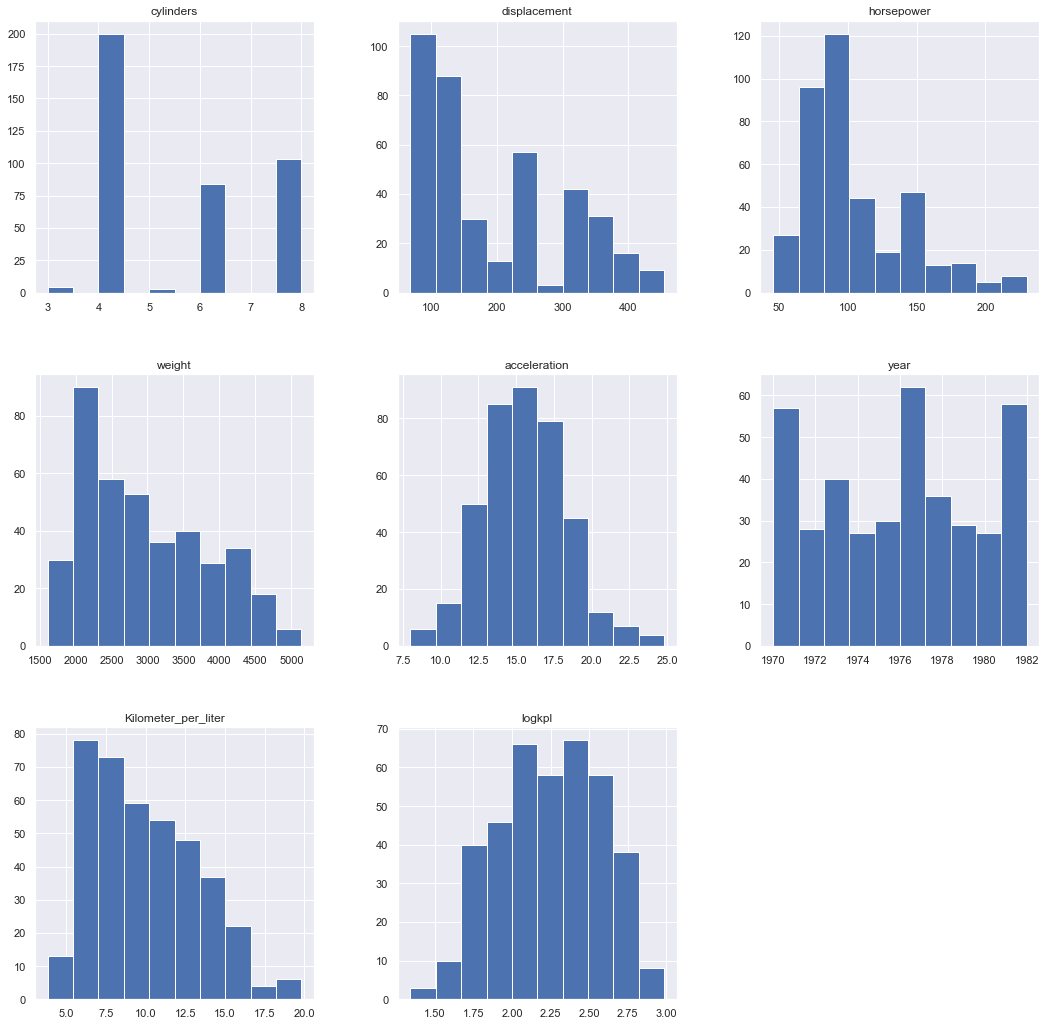

In [243]:
fig = data_1.hist(figsize = (18,18))


<a id='Univariate_Analysis'></a>
## 4.1 Univariate Analysis

**1. Kilometer_per_liter**

In [244]:
data_1.Kilometer_per_liter.describe()


count    394.000000
mean       9.966922
std        3.310379
min        3.826293
25%        7.280586
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

**So the minimum value is 9 and maximum is 46, but on average it is 23.44 with a variation of 7.8**

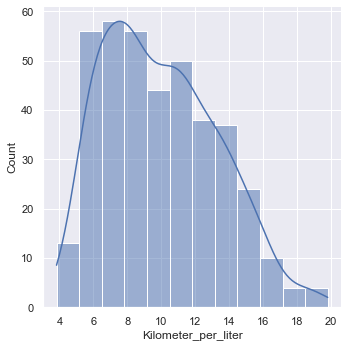

In [245]:
sns.displot(data_1.Kilometer_per_liter, kde=True)
plt.show()

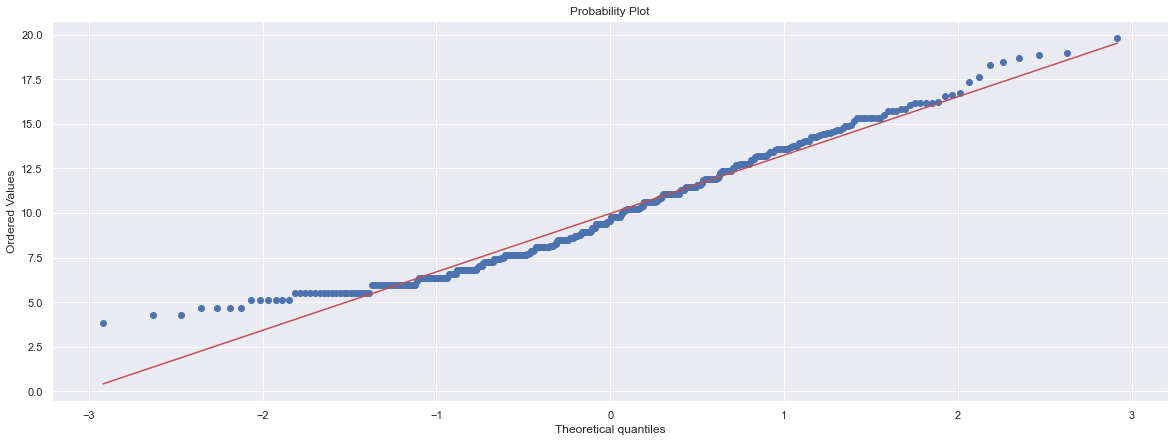

We expect that our data points will be on red line for gaussian distributin. We see dist tails


In [246]:
# qq plot:
plt.figure(figsize = (20,7))
stats.probplot(data["Kilometer_per_liter"],plot=plt)
plt.show()
print("We expect that our data points will be on red line for gaussian distributin. We see dist tails")


In [247]:
print("Skewness: %f" % data['Kilometer_per_liter'].skew())
print("Kurtosis: %f" % data['Kilometer_per_liter'].kurt())

Skewness: 0.458823
Kurtosis: -0.504455


**We can see that Kilometer_per_liter is not normally distributed**

Log-Transformation

In [248]:
data_2 = data_1.copy(deep = True)

In [249]:
data_2['log_mileage'] = np.log(data_2.Kilometer_per_liter)

In [250]:
data_2.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model,logkpl,log_mileage
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu,2.035044,2.035044
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320,1.852722,1.852722
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite,2.035044,2.035044
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst,1.917261,1.917261
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino,1.977885,1.977885


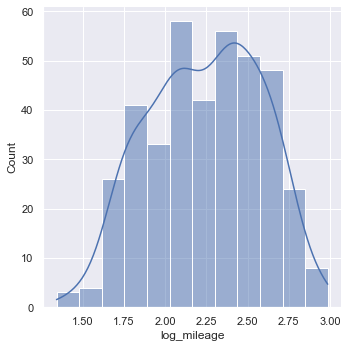

In [251]:
sns.displot(data_2.log_mileage, kde=True)
plt.show()

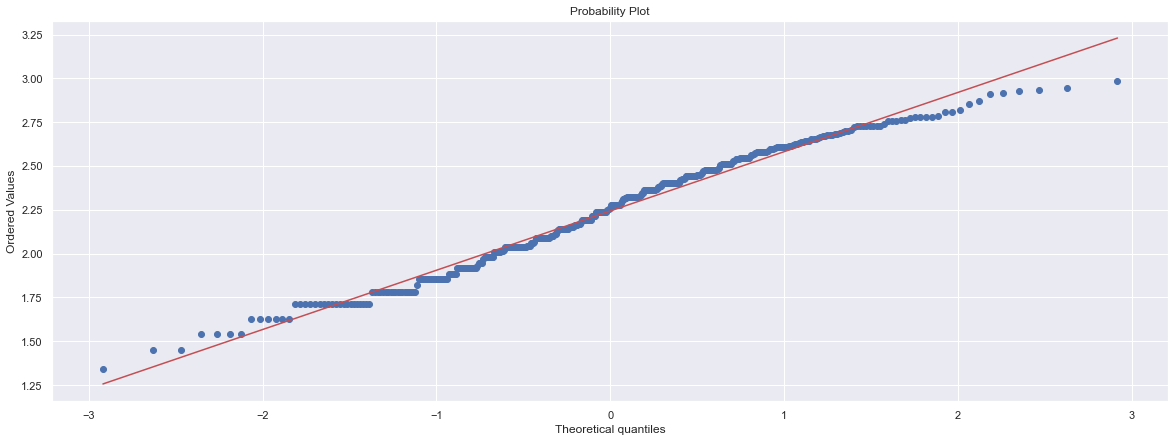

We expect that our data points will be on red line for gaussian distributin. We see dist tails


In [252]:
# qq plot:
plt.figure(figsize = (20,7))
stats.probplot(data_2.log_mileage,plot=plt)
plt.show()
print("We expect that our data points will be on red line for gaussian distributin. We see dist tails")


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>From above plots we can see that mileage is normally distributed</b>     </font>
            </div>
        </td>
    </tr>
</table>

**2. Distribution of Displacement**

Engine displacement is the swept volume of all the pistons inside the cylinders of a reciprocating engine in a single movement from top dead centre (TDC) to bottom dead centre (BDC).

In [253]:
data_2.displacement.describe()

count    394.000000
mean     194.181472
std      104.490759
min       68.000000
25%      105.000000
50%      151.000000
75%      265.750000
max      455.000000
Name: displacement, dtype: float64

**So the minimum value is 68 and maximum is 455, but on average it is 194.41 with a variation of 104.64**

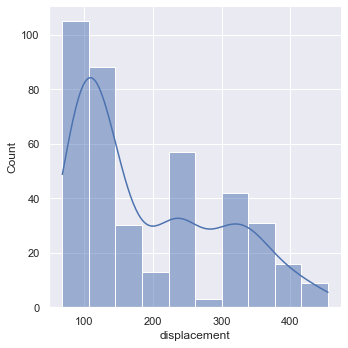

In [254]:
sns.displot(data_2.displacement,kde=True)
plt.show()

**3. Analysis of Cylinder**

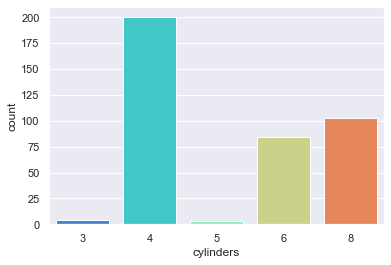

In [255]:
sns.countplot(x=data_2.cylinders,data=data_1,palette = "rainbow")
plt.show()

**From above Countplot**

* From the above above plot we can visualize that there are maximum number of 4 cylinder vehicles. 
* Around 98% of the vehicles are either of 4, 6, 8 cylinders and only small percent of vehicles are either of 3 and 5 cylinders.
* Cylinders is categorical, but in our dataset it is numerical.So changing type



In [256]:
data_3 = data_2.copy(deep = True)

In [257]:
data_3.cylinders = data_3.cylinders.astype('object')

In [258]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 397
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               394 non-null    object 
 1   cylinders            394 non-null    object 
 2   displacement         394 non-null    float64
 3   horsepower           394 non-null    float64
 4   weight               394 non-null    int64  
 5   acceleration         394 non-null    float64
 6   year                 394 non-null    int64  
 7   Kilometer_per_liter  394 non-null    float64
 8   manufacturer         394 non-null    object 
 9   model                394 non-null    object 
 10  logkpl               394 non-null    float64
 11  log_mileage          394 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 48.1+ KB


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>From output we can see that cylinder attribute is now object</b>     </font>
            </div>
        </td>
    </tr>
</table>

**4. Analysis of model year**

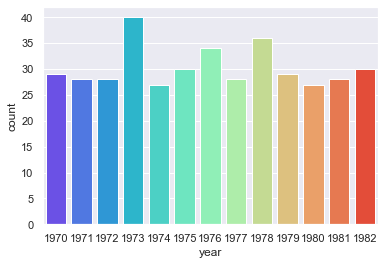

In [259]:
sns.countplot(x=data_3['year'],palette = "rainbow")
plt.show()

**Maximum number of vehicles are of the year 1973 and minumum number of the year 1974.**

**5. Analysis of Origin**

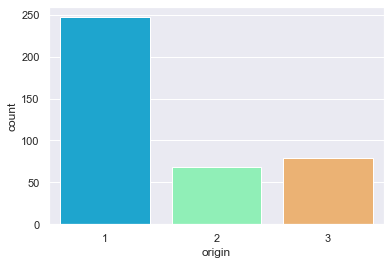

In [260]:
sns.countplot(x=data_3.origin,palette = "rainbow")
plt.show()

**Most of the vehicles are from region 1 as compared to the other two regions.**

**6. Analysis of Horsepower**

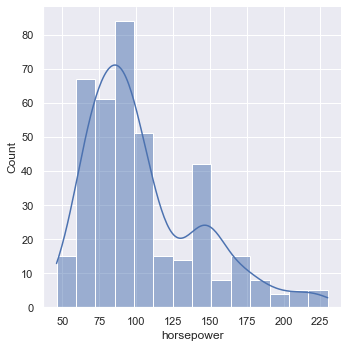

In [261]:
sns.displot(data_3.horsepower,kde=True)
plt.show()

**From above distribution**

* Horsepower rates the engine performance of cars
* We can visualize that most of the vehicles have around 75-110 horsepower 
* And only few vehicles have horsepoer above 200.

**7. Analysis of Manufacturer**

In [262]:
!pip install tabulate

Cars from 30 manufacturers (Top10)
----------  --
ford        50
chevrolet   47
plymouth    31
dodge       28
amc         27
toyota      26
datsun      23
volkswagen  22
buick       17
pontiac     16
----------  --


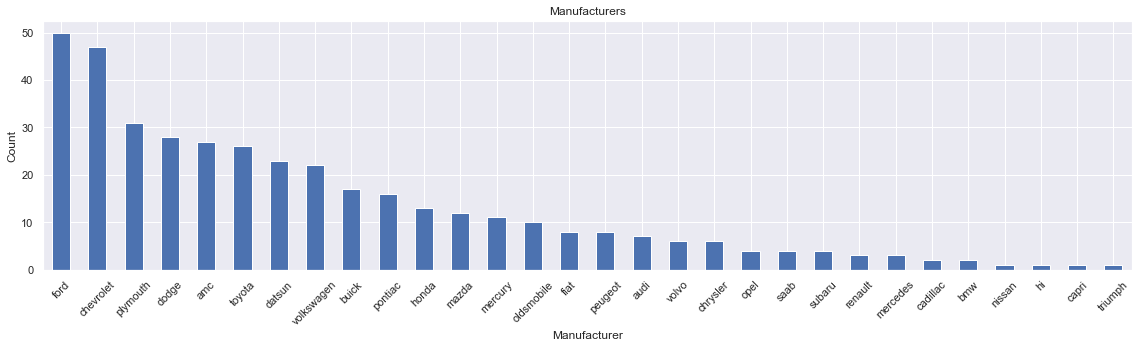

In [263]:
from tabulate import tabulate
print(f"Cars from {data_3.manufacturer.nunique()} manufacturers (Top10)")
print(tabulate(pd.DataFrame(data_3.manufacturer.value_counts()[:10])))

plt.figure(figsize=(16,5));
data_3.groupby("manufacturer")["manufacturer"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Manufacturers")
plt.ylabel("Count")
plt.xlabel("Manufacturer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**8. Analysis of Model**

293 car models (Top 10)
--------  -
pinto     6
rabbit    5
maverick  5
corolla   5
matador   5
chevette  4
hornet    4
impala    4
corona    4
504       4
--------  -


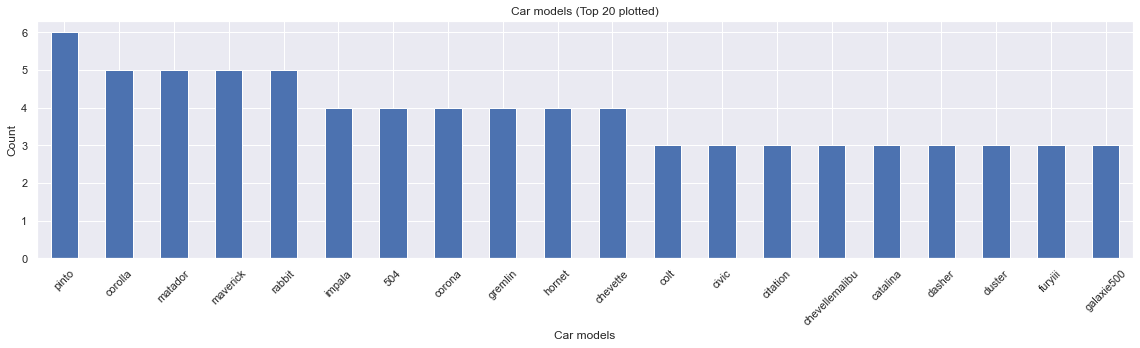

In [264]:
print(f"{data_3.model.nunique()} car models (Top 10)")
print(tabulate(pd.DataFrame(data_3.model.value_counts()[:10])))

plt.figure(figsize=(16,5));
data_3.groupby("model")["model"].count().sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Car models (Top 20 plotted)")
plt.ylabel("Count")
plt.xlabel("Car models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id='Multivariate_Analysis'></a>
## 4.2 Multivariate Analysis

**1. Analysis of kilometer_per_liter with horsepower**

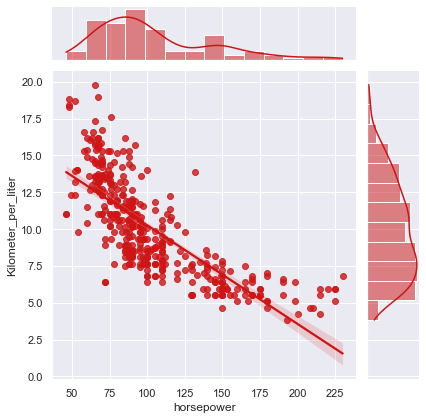

In [265]:
x = data_3[['Kilometer_per_liter','horsepower']]
sns.jointplot(x=x.loc[:,'horsepower'], y=x.loc[:,'Kilometer_per_liter'], kind="reg", color="#ce1414")


**We can see from the plot that as horsepower increase Kilpmeter_per_liter decreases.**

**2. Analysis of kilometer_per_liter with weight**

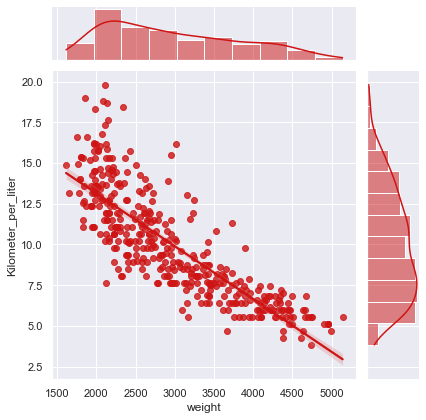

In [266]:
x = data_3[['Kilometer_per_liter','weight']]
sns.jointplot(x=x.loc[:,'weight'], y=x.loc[:,'Kilometer_per_liter'], kind="reg", color="#ce1414")


**3. Analysis of kilometer_per_liter with accleration**

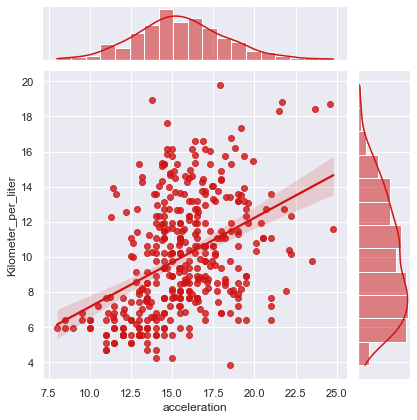

In [267]:
x = data_3[['Kilometer_per_liter','acceleration']]
sns.jointplot(x=x.loc[:,'acceleration'], y=x.loc[:,'Kilometer_per_liter'], kind="reg", color="#ce1414")
plt.show()


**4. Analysis of kilometer_per_liter with displacement**

C:\Users\Dhananjay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


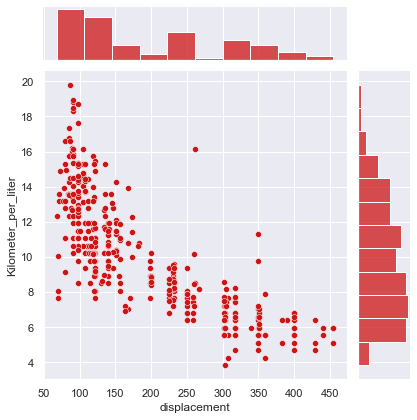

In [269]:
x = data_3[['Kilometer_per_liter','displacement']]
sns.jointplot(x.loc[:,'displacement'], x.loc[:,'Kilometer_per_liter'], kind="scatter", color="#ce1414")


**From plot we can see a inverse relationship**

**5. Analysis of kilometer_per_liter with cylinders**

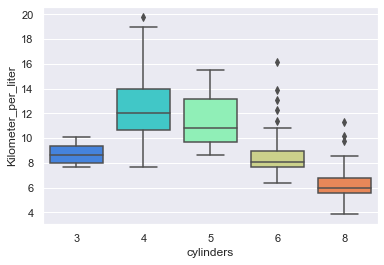

In [270]:
sns.boxplot(y='Kilometer_per_liter',x='cylinders',data=data_3,palette = "rainbow")
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>We can easily visualize that the mileage per gallon (mpg) of 4 cylinder vehicles is maximum and we also saw that most of the vehicles are 4 cylinder.</b>     </font>
            </div>
        </td>
    </tr>
</table>

**6. Analysis of kilometer_per_liter with year**

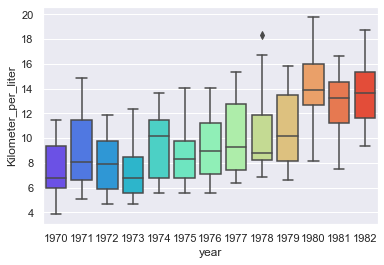

In [271]:
sns.boxplot(y='Kilometer_per_liter',x='year',data=data,palette = "rainbow")
plt.show()


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>With every year and with the newer models of the vehicles mileage per gallon (mpg) also increases.</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Covariance'></a>
## 4.3 Covariance

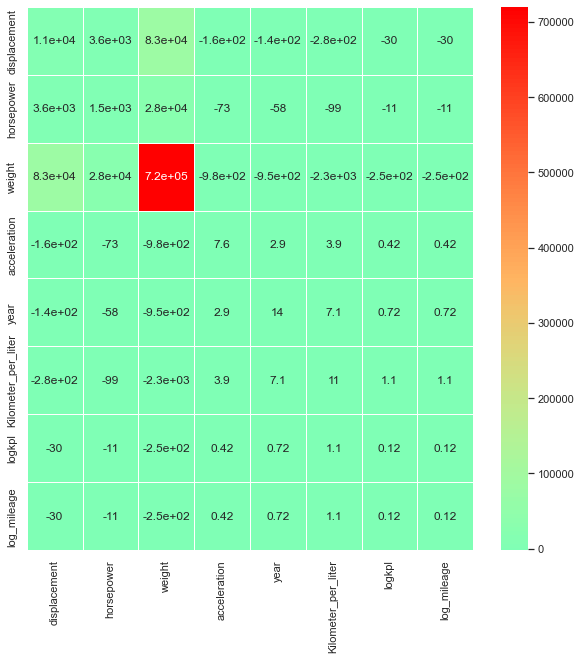

In [272]:
plt.figure(figsize=(10,10))
sns.heatmap(data_3.cov(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>A positive covariance means that asset returns move together while a negative covariance means they move inversely.</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Correlation'></a>
## 4.4 Correlation

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Call the corr() function which will return the correlation matrix of numeric variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [273]:
# check correlation
data_num = data_3.drop(['Kilometer_per_liter','log_mileage','origin'],axis = 1)
corr = data_num.corr()
corr

,displacement,horsepower,weight,acceleration,year,logkpl
displacement,1.000000,0.896736,0.933093,-0.544797,-0.365373,-0.853455
horsepower,0.896736,1.000000,0.864186,-0.689545,-0.412209,-0.829557
weight,0.933093,0.864186,1.000000,-0.418868,-0.303887,-0.875076
acceleration,-0.544797,-0.689545,-0.418868,1.000000,0.283843,0.447355
year,-0.365373,-0.412209,-0.303887,0.283843,1.000000,0.574612
logkpl,-0.853455,-0.829557,-0.875076,0.447355,0.574612,1.000000


<AxesSubplot:>

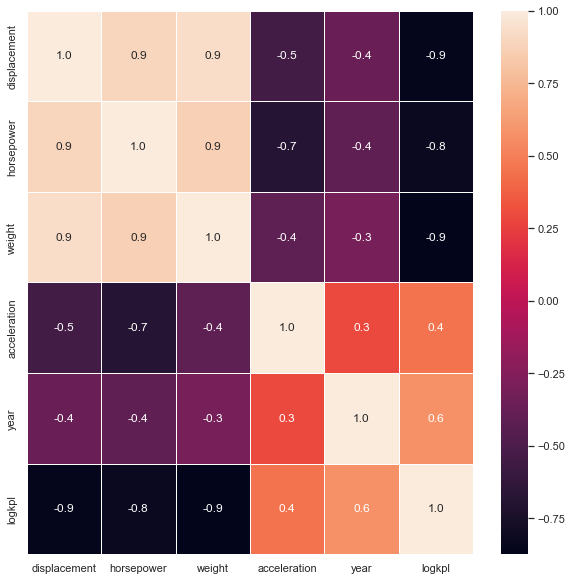

In [274]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

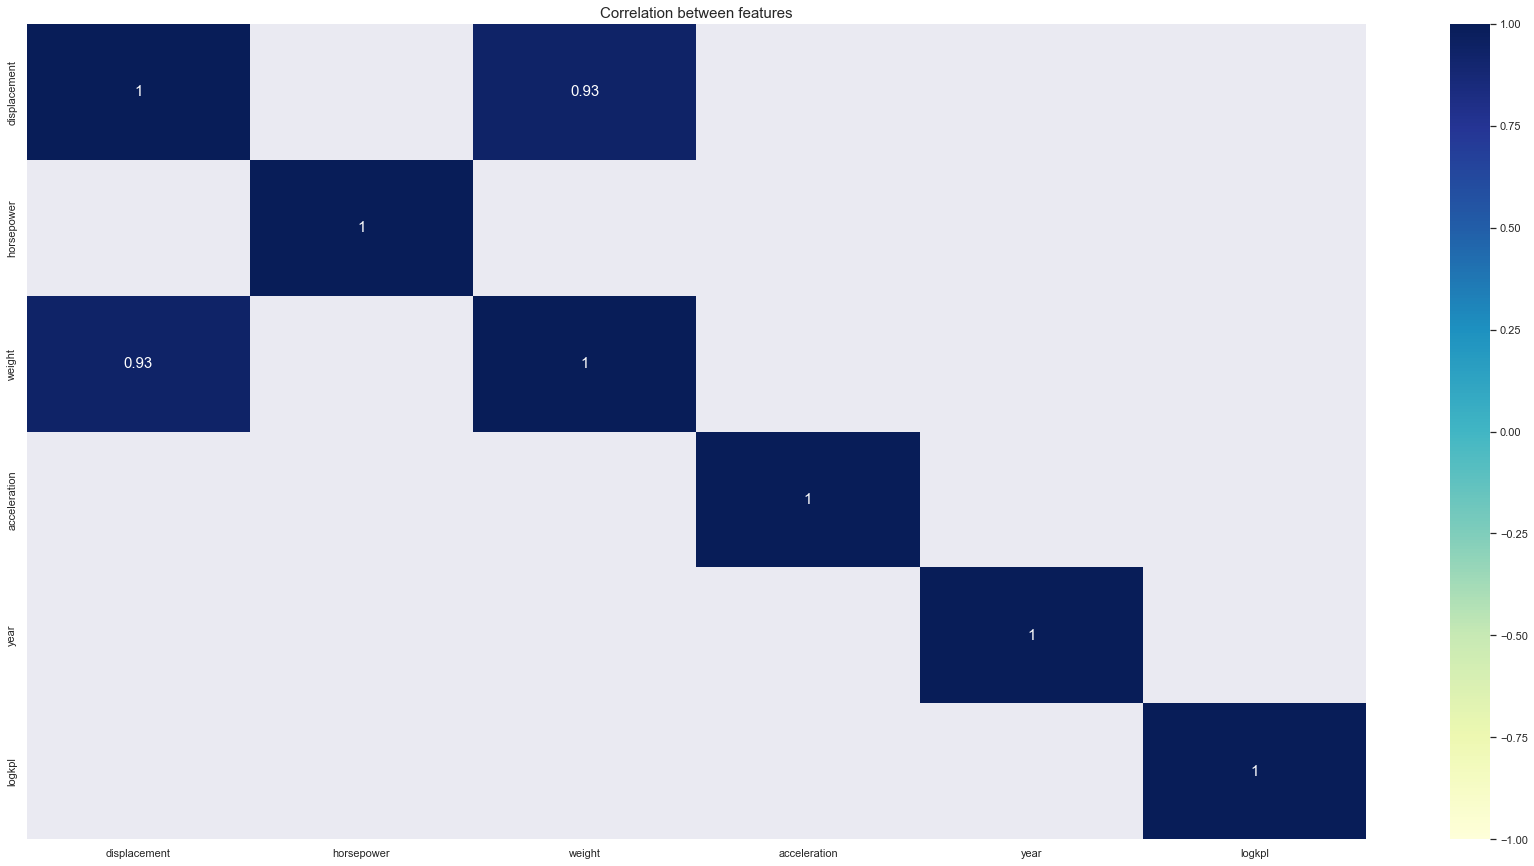

In [275]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

plt.title('Correlation between features', fontsize=15)

plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>By looking at the correlation matrix we can see that variables 'displacement','weight' and 'horse' have a strong positive correlation with each other. These feature pairs are strongly correlated to each other. Ideally, we should not select these features together for training the model. </b>     </font>
            </div>
        </td>
    </tr>
</table>

In [276]:
drop_list = ['weight','displacement','manufacturer', 'model']
data_cleaned = data_3.drop(drop_list,axis = 1 )        
data_cleaned.head()

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,logkpl,log_mileage
0,1,8,130.0,12.0,1970,7.652587,2.035044,2.035044
1,1,8,165.0,11.5,1970,6.377156,1.852722,1.852722
2,1,8,150.0,11.0,1970,7.652587,2.035044,2.035044
3,1,8,150.0,12.0,1970,6.802299,1.917261,1.917261
4,1,8,140.0,10.5,1970,7.227443,1.977885,1.977885


In [277]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               394 non-null    object 
 1   cylinders            394 non-null    object 
 2   horsepower           394 non-null    float64
 3   acceleration         394 non-null    float64
 4   year                 394 non-null    int64  
 5   Kilometer_per_liter  394 non-null    float64
 6   logkpl               394 non-null    float64
 7   log_mileage          394 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 35.8+ KB


In [278]:
# print the name of columns
data_cleaned.columns

Index(['origin', 'cylinders', 'horsepower', 'acceleration', 'year',
       'Kilometer_per_liter', 'logkpl', 'log_mileage'],
      dtype='object')

<a id="Label_Encoding_of_Categorical_Data"> </a>
## 5. Label Encoding of Categorical Data

In [279]:
data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)
data_with_dummies.head()

C:\Users\Dhananjay\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,horsepower,acceleration,year,Kilometer_per_liter,logkpl,log_mileage,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.0,12.0,1970,7.652587,2.035044,2.035044,0,0,0,0,0,1
1,165.0,11.5,1970,6.377156,1.852722,1.852722,0,0,0,0,0,1
2,150.0,11.0,1970,7.652587,2.035044,2.035044,0,0,0,0,0,1
3,150.0,12.0,1970,6.802299,1.917261,1.917261,0,0,0,0,0,1
4,140.0,10.5,1970,7.227443,1.977885,1.977885,0,0,0,0,0,1


<a id="Standardise_Data"> </a>
## 6. Standardise Data

In [280]:
from sklearn.preprocessing import MinMaxScaler

In [281]:
x = data_with_dummies.drop(['Kilometer_per_liter','log_mileage'],axis = 1)

In [282]:
scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [283]:
X = scaler.fit_transform(X)

In [284]:
y = data_with_dummies.log_mileage

**Split data into train and test**

In [285]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (315, 7)
X_test  (79, 7)
y_train  (315,)
y_test  (79,)


<a id="Linear_Regression"> </a>
## 7. Linear Regression

<a id="Ordinary_Least_Square"> </a>
## 7.1 Ordinary Least Square

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a Linear regression model. We start with our data set gradually proceeding with our analysis<br><br>
                        In order to build a Linear regression model, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [286]:
from sklearn.linear_model import LinearRegression
# build the model
OLS_model = LinearRegression()

# fit the model
OLS_model.fit(X_train, y_train)


LinearRegression()

**2. Predict the values**

In [287]:
# predict the values
y_pred_OLS = OLS_model.predict(X_test)

**Before we compute accuracy let's plot the predicted values**

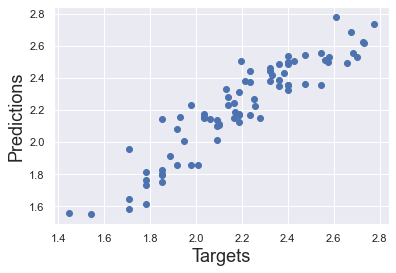

In [288]:
plt.scatter(y_test,y_pred_OLS)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Our model fit well to some extent</b>
                </font>
            </div>
        </td>
    </tr>
</table>



**3. Compute accuracy measures**

In [289]:
# compute the R-Squared
r_squared_OLS = OLS_model.score(X_train,y_train)

# Number of observation or sample size
n = 313 

# No of independent variables
p = 9

#Compute Adj-R-Squared
Adj_r_squared_OLS = 1 - (1-r_squared_OLS)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_OLS = sqrt(mean_squared_error(y_test, y_pred_OLS))



**4. Tabulate the results**

In [297]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', ''R-squared', 'Adj R-squared', 'RMSE'

# create a list of column names
cols = ['Model', 'R-squared', 'Adj R-squared', 'RMSE']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
OLS_metrics = pd.Series({'Model': "OLS",
                 'R-squared' : r_squared_OLS, 'Adj R-squared' : Adj_r_squared_OLS , 'RMSE' :rmse_OLS})



# appending our result table
result_tabulation = result_tabulation.append(OLS_metrics , ignore_index = True)

# view the result table
result_tabulation

C:\Users\Dhananjay\AppData\Local\Temp\ipykernel_12336\2836915390.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(OLS_metrics , ignore_index = True)


,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.884099,0.880656,0.116974


<a id="Linear_Regression_using_SGD"> </a>
## 7.2 Linear Regression using SGD

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a Linear regression model using SGD Regressor. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to build a Linear regression model using SGD Regressor, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [298]:
from sklearn.linear_model import SGDRegressor

# build the model
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 1000)

# fit the model
SGD_model.fit(X_train, y_train)

C:\Users\Dhananjay\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


SGDRegressor(alpha=0.1, loss='squared_loss')

**2. Make Predictions**

In [299]:
# predict the values
y_pred_SGD  = SGD_model.predict(X_test)

Before we compute accuracy let's plot the predicted values

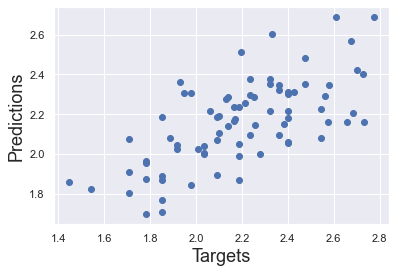

In [300]:
plt.scatter(y_test,y_pred_SGD)
plt.xlabel('Targets' ,size = 18)
plt.ylabel('Predictions',size = 18)
plt.show()

**3. Compute accuracy measures**

In [301]:
# compute the R-Squared
r_squared_SGD = SGD_model.score(X_train,y_train)

# Number of observation or sample size
n = 313 

# No of independent variables
p = 9

#Compute Adj-R-Squared
Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

# Compute RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_SGD = sqrt(mean_squared_error(y_test, y_pred_SGD))




**4. Tabulate the results**

In [302]:


# compiling the required information
SGD_metrics = pd.Series({'Model': "SGD",
                 'R-squared' : r_squared_SGD, 'Adj R-squared' : Adj_r_squared_SGD , 'RMSE' :rmse_SGD})



# appending our result table
result_tabulation = result_tabulation.append(SGD_metrics , ignore_index = True)

# view the result table
result_tabulation

C:\Users\Dhananjay\AppData\Local\Temp\ipykernel_12336\781263362.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_tabulation = result_tabulation.append(SGD_metrics , ignore_index = True)


,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.884099,0.880656,0.116974
1,SGD,0.625017,0.613879,0.222366


<a id="model_cmp"> </a>
## 5. Model Comparision

In [303]:
result_tabulation

,Model,R-squared,Adj R-squared,RMSE
0,OLS,0.884099,0.880656,0.116974
1,SGD,0.625017,0.613879,0.222366


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>It can be seen from the result tabulation, that accuracy measures for the OLS is better than SGD. </b>
                </font>
            </div>
        </td>
    </tr>
</table>